两种降维的途径：投影$(projection)$和流形学习$(Manifold\ Learning)$       
三种降维的技术：$PCA, Kernel\ PCA, LLE$

In [1]:
# 2D
import numpy as np
p = 0
for it in range(100001):
    x1, y1 = np.random.ranf(), np.random.ranf()
    x2, y2 = np.random.ranf(), np.random.ranf()
    p += np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
print(1.0 * p / 100000)

0.5215003291824485


In [2]:
# 3D
p = 0
for it in range(100001):
    x1, y1, z1 = np.random.ranf(), np.random.ranf(), np.random.ranf()
    x2, y2, z2 = np.random.ranf(), np.random.ranf(), np.random.ranf()
    p += np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1-z2) ** 2)
print(1.0 * p / 100000)

0.6608013968282513


In [3]:
# 7D
p = 0
for it in range(100001):
    (x1, y1, z1, a1, b1, c1, d1, e1) = (np.random.ranf(), np.random.ranf(), np.random.ranf(), np.random.ranf(), 
                                    np.random.ranf(), np.random.ranf(), np.random.ranf(), np.random.ranf())
    (x2, y2, z2, a2, b2, c2, d2, e2) = (np.random.ranf(), np.random.ranf(), np.random.ranf(), np.random.ranf(), 
                                    np.random.ranf(), np.random.ranf(), np.random.ranf(), np.random.ranf())
    p += np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2+(a1-a2)**2 +(b1-b2)**2+(c1-c2)**2+(d1-d2)**2+(e1-e2)**2)
print(1.0 * p / 100000)

1.1286641926694834


由上述计算可知，当维数增加时，hypercube中两点距离变大，当维数为1e6时，avg_dis=408.25,可知在高维空间内数据点间隔较大，分布非常稀疏，   
这意味着遇到的new instace 也可能距离所有的train instances很远, 从而导致预测相比低维空间不可靠, 通常表现为overfitting, 因为模型做了很强的外推。一种直观的解决方法是增大数据密度然而显然这是不切实际的。

## Main Approaches for Dimensionality Reduction

### Projection 投影法
投影法基于这样的事实：虽然数据是多维度的，但是数据之间强关联性或者某类特征为常量，这样产生的数据集就很有可能仅仅lie with很低的维度，比如下面的3D数据

![](https://s1.ax1x.com/2018/06/03/CTEFNn.png)

可以看出数据仅在灰色平面上， 因此我们可以做这样的降维处理    
![](https://s1.ax1x.com/2018/06/03/CTEE90.png)

但是不是所有的数据集合都是可以简单通过投影进行降维的，对于Swiss roll dataset，我们希望能有更好的方法降低维度

#### Swiss rollm

In [4]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

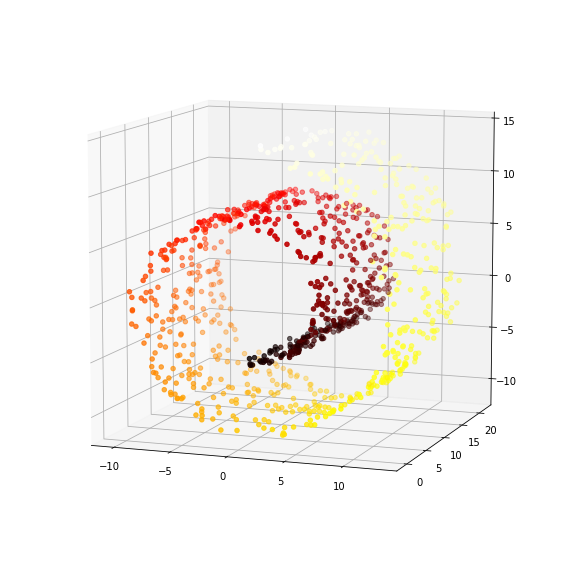

In [5]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot) # 绘点
ax.view_init(10, -70) # 视角
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

我们应该把瑞士卷拉开展平在2D上，而不是直接拍平

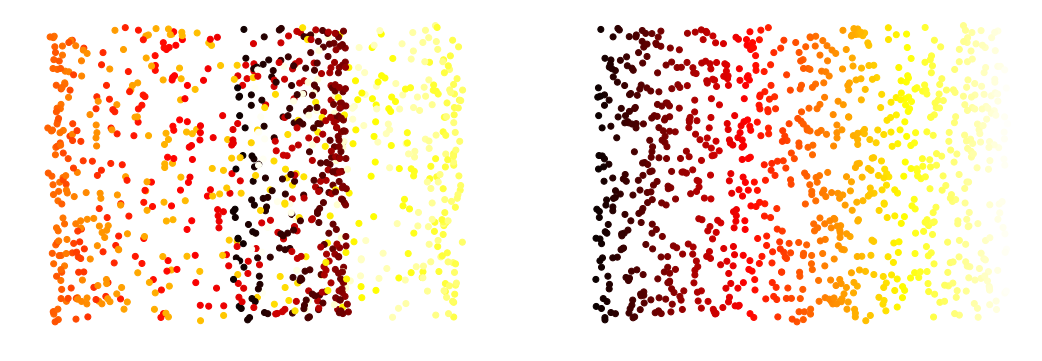

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis('off')
plt.subplot(122)
plt.scatter(t, X[:,1], c=t, cmap=plt.cm.hot)
plt.axis('off')
plt.show()

## Manifold Learning

所谓流形是指d维的超平面在更高的n维空间被bent,twist, 比如上面的右图其在作为2D平面在3D空间被roll后形成了3D瑞士卷

### PCA 
Principal Component Analysis

In [7]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### Principal Component(PCs)

In [8]:
# 使用SVD(奇异值分解)求主成分PCs
import numpy as np
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V[:, 0]
c2 = V[:, 1]
c1, c2 # PCs

(array([ 0.93636116, -0.34027485, -0.08626012]),
 array([ 0.29854881,  0.90119108, -0.31420255]))

In [9]:
c1.dot(c2) # 正交

2.255140518769849e-16

In [10]:
W2 = V.T[:, :2]
X2D = X_centered.dot(W2)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X) # automatic centering

In [12]:
print(pca.explained_variance_ratio_) # 可解释方差比, 反映了特征所在轴的方差占比

[0.84248607 0.14631839]


### Choose the Right Number of Dimensions 

In [13]:
# 假设我们要求降维后的数据保存95%的信息
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_) # 前缀和cumsum
d = np.argmax(cumsum >= 0.95) + 1
print(d, cumsum[d-1])
pca = PCA(n_components=d) # or n_components = 0.95

2 0.988804464429311


### PCA for Compression

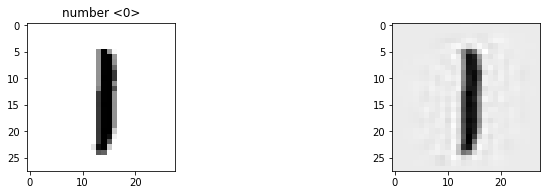

In [14]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import matplotlib
mnist = fetch_mldata("mnist original")

X = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
def plot_digit(flat, size=28):
    img = flat.reshape(size, size)
    plt.imshow(img, cmap=matplotlib.cm.binary, interpolation='nearest')
s = 5555
some_digit = X_train[s]
plt.figure(figsize=(12,6))
plt.subplot(221)
plt.title('number <{}>'.format(int(y[s])))
plot_digit(some_digit)
plt.subplot(222)
pca = PCA(n_components=169)
X_reduced = pca.fit_transform(X_train)
X_recoverd = pca.inverse_transform(X_reduced)
plot_digit(X_recoverd[s]) # 绘制解压图像
plt.show()

### Incremental PCA

In [15]:
%matplotlib notebook
from sklearn.decomposition import IncrementalPCA
import numpy as np
n_batchs = 100
inc_pac = path = IncrementalPCA(n_components=169)
for X_batch in np.array_split(X_train, n_batchs):
    inc_pac.partial_fit(X_batch)
X_mnist_reduced = inc_pac.fit_transform(X_train)
X_mnist_recoverd = inc_pac.inverse_transform(X_mnist_reduced)
plot_digit(X_mnist_recoverd[s])

<IPython.core.display.Javascript object>

In [31]:
import cv2 as cv
img = cv.imread('/Users/hu-osx/Desktop/ER.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
plt.imshow(img)
plt.show()